<a href="https://colab.research.google.com/github/ZoneSixGames/ML-Prompt-Scripts/blob/main/Noodle_Soup_Prompts_Prompt_Terminology_Generator_v3_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 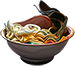 <font size="6">**Noodle Soup Prompts** v3.0</font> <font size="5">- Prompt Terminology Generator</font> ![visitors](https://visitor-badge.glitch.me/badge?page_id=Noodle-Soup-Prompts&left_color=blue&right_color=orange) 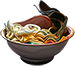

This tool contains a *growing* database of terminology to help build interesting prompts for [Disco Diffusion](https://discodiffusion.com/). **Give it a try!**

Artist names gathered by **MisterRuffian** <font size="2">(<font color="7e87f6">Discord</font> Misterruffian#2891)</font> on his amazing [Latent Artist & Modifier Encyclopedia](https://docs.google.com/spreadsheets/d/1_jgQ9SyvUaBNP1mHHEzZ6HhL_Es1KwBKQtnpnmWW82I/).

Terminology Database created by **WAS**asquatch <font size="2">(<font color="7e87f6">Discord</font>: WAS\#0263)</font>


## Other Tools

- [Easy Diffusion](https://rebrand.ly/easy-diffusion) - A fork of [NOP's Stable Diffusion notebook](https://colab.research.google.com/drive/1jUwJ0owjigpG-9m6AI_wEStwimisUE17#scrollTo=_ekR-LW6trWG), packed full of features. 
- [DiscoStream](https://rebrand.ly/discostream) - A new fork of Disco Diffusion designed to be a little easier to use, with advanced functionality. It also includes GO BIG v2!
- [OpenAI Guided Diffusion - Model Training / Fine-Tuning](https://rebrand.ly/guided-diffusion) - A implementation of OpenAI's Guided Diffusion on Google Colabs
- [Portrait Playground](https://rebrand.ly/portrait-playground) - A version of Disco Diffusion with all current Portrait Generator Models.
- [Portrait Generator `init_image` Prep](https://rebrand.ly/dd-image-prep) - Prep portraits other other `init_images` as approximations for better DD improvisation.  


# Process Text Prompts

In [ ]:
from genericpath import exists
#@markdown ## [Terminology Noodle Wiki](https://github.com/WASasquatch/noodle-soup-prompts/wiki/Terminology-Reference)
#@title <font size="">3) Cook up some Noodle Soup</font>
#@markdown *Run this cell to return your processed prompt*<br>
#@markdown Use `|` to deliminate a new list element *(only valid for Disco Diffusion / DiscoStream)*
import random, subprocess, time, json

class log:
    f = lambda color: lambda string: print(color + string + "\33[0m")
    black = f("\33[30m")
    red = f("\33[31m")
    green = f("\33[32m")
    yellow = f("\33[33m")
    blue = f("\33[34m")
    megenta = f("\33[35m")
    cyan = f("\33[36m")
    white = f("\33[37m")

try:
    import nsp_pantry
    from nsp_pantry import nsp_parse
except ImportError:
    print(subprocess.run(['wget', '-q', '--show-progress', '--no-cache', '--backups=1', 'https://raw.githubusercontent.com/WASasquatch/noodle-soup-prompts/main/nsp_pantry.py'], stdout=subprocess.PIPE).stdout.decode('utf-8'))
finally:
    import nsp_pantry
    from nsp_pantry import nsp_parse

#@markdown ---
prompt = 'Portrait of a _adj-beauty_ _noun-emote_ _body-fit_ _nationality_ woman from _pop-culture_ in _pop-location_  by _artist_, _site_ | Intricate Detail, Elaborate Desings, HD, 8k resolution' #@param{type: 'string'}
bowls_of_soup = 5 #@param {type: 'number'}
#@markdown &nbsp;&nbsp;&nbsp;&nbsp;**bowls_of_soup:** *How many prompt iterations should we run?*
output_mode = 'Stable Diffusion' #@param['Stable Diffusion', 'Disco Diffusion / DiscoStream']
save_text_file = True #@param{type: 'boolean'}

text_file_list = []

displayPrint = True
if output_mode == 'Disco Diffusion / DiscoStream':
    prompt = [x.strip() for x in prompt.split('|')]
    if type(prompt) is list:
        displayPrint = False
        text_file_list = {}

log.green("TEXT PROMPTS CODE:")
for i in range(1, bowls_of_soup+1):
    log.blue("\n\033[1mTEXT PROMPT "+str(i)+":\033[0m")
    if displayPrint:
        pprompt = nsp_parse(prompt)
        if save_text_file:
            text_file_list.append(pprompt)
        print(pprompt)
    else:
        prompt = nsp_parse(prompt)
        if save_text_file:
            text_file_list[i] = prompt
        print('[')
        for i in range(len(prompt)):
            deliminator = ',' if i != len(prompt)-1 else ''
            print(f'    \'{prompt[i]}\'{deliminator}')
        print(']')


if save_text_file:
    if displayPrint:
        with open(f'prompts_{str(int(time.time()))}.txt', 'w') as f:
            for p in text_file_list:
                f.write(p)
                f.write('\n')
    else:
        with open(f'prompts_{str(int(time.time()))}.txt', 'w') as f:
            f.write(json.dumps(text_file_list, indent=4))


TEXT PROMPTS CODE:

TEXT PROMPT 1:
Red Spider Nebula, Sculptor Galaxy, Acrab Star

TEXT PROMPT 2:
Bug Nebula, Hoag's Object, Mintaka Star

TEXT PROMPT 3:
Cotton Candy Nebula, Mayall's Object, Peacock Star

TEXT PROMPT 4:
Gum Nebula, Hercules A Galaxy, Aspidiske Star

TEXT PROMPT 5:
Bow-Tie Nebula, Southern Pinwheel Galaxy, Castor Star
